In [34]:
# install Pyspark only if you don't have it installed on your machine
#!pip install pyspark

In [35]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName('DataProcessingParksDataset').getOrCreate()

In [36]:
# Check the active SparkContext
sc = spark.sparkContext
print(f"SparkContext is active: {sc is not None}")
# Print the app name from SparkContext
print(f"Spark app name: {sc.appName}")

SparkContext is active: True
Spark app name: DataProcessingExample


In [37]:
# Load data into Spark DataFrame
df = spark.read.csv('../data/park-data.csv', header=True, inferSchema=True)

Some basic checking of the dataframe that has been created

In [38]:
# Show the first 5 rows of the DataFrame
df.show(10)

+-----------------+-------+--------------------+-------+------+----------+----------+-------------------------------------+--------------------+----------------------+--------------------+---------------------+-------------------+-------------------+------------------+
|        Area Name|Area ID|           Park Name|Park ID|  Date|Start Time|  End Time|Total Time (in minutes, if available)|     Park Conditions|Other Animal Sightings|              Litter|Temperature & Weather|Number of Squirrels|Squirrel Sighter(s)|Number of Sighters|
+-----------------+-------+--------------------+-------+------+----------+----------+-------------------------------------+--------------------+----------------------+--------------------+---------------------+-------------------+-------------------+------------------+
|  UPPER MANHATTAN|      A|     Fort Tryon Park|    1.0|3/1/20|3:14:00 PM|4:05:00 PM|                                   51|                Busy|  Humans, Dogs, Pig...|                Some|  

In [39]:
df.printSchema()

root
 |-- Area Name: string (nullable = true)
 |-- Area ID: string (nullable = true)
 |-- Park Name: string (nullable = true)
 |-- Park ID: double (nullable = true)
 |-- Date: string (nullable = true)
 |-- Start Time: string (nullable = true)
 |-- End Time: string (nullable = true)
 |-- Total Time (in minutes, if available): integer (nullable = true)
 |-- Park Conditions: string (nullable = true)
 |-- Other Animal Sightings: string (nullable = true)
 |-- Litter: string (nullable = true)
 |-- Temperature & Weather: string (nullable = true)
 |-- Number of Squirrels: integer (nullable = true)
 |-- Squirrel Sighter(s): string (nullable = true)
 |-- Number of Sighters: integer (nullable = true)



In [40]:
df.describe().show()

+-------+---------------+-------+--------------------+-----------------+------+----------+----------+-------------------------------------+-----------------+----------------------+--------------------+---------------------+-------------------+-------------------+------------------+
|summary|      Area Name|Area ID|           Park Name|          Park ID|  Date|Start Time|  End Time|Total Time (in minutes, if available)|  Park Conditions|Other Animal Sightings|              Litter|Temperature & Weather|Number of Squirrels|Squirrel Sighter(s)|Number of Sighters|
+-------+---------------+-------+--------------------+-----------------+------+----------+----------+-------------------------------------+-----------------+----------------------+--------------------+---------------------+-------------------+-------------------+------------------+
|  count|             25|     25|                  25|               25|    25|        25|        25|                                   25|            

Basic Transformation

In [41]:
# Perform some basic cleaning: Remove rows with null values
df_cleaned = df.dropna()

In [42]:
# Perform some transformations: Select specific columns
df_transformed = df_cleaned.select("Area Name", "Park Name", "Park Conditions", "Number of Squirrels")
# Show the transformed data
df_transformed.show()

+-----------------+--------------------+--------------------+-------------------+
|        Area Name|           Park Name|     Park Conditions|Number of Squirrels|
+-----------------+--------------------+--------------------+-------------------+
|  UPPER MANHATTAN|     Fort Tryon Park|                Busy|                 12|
|  UPPER MANHATTAN| J. Hood Wright Park|                Calm|                 24|
|  UPPER MANHATTAN|     Highbridge Park|Calm, pick-up bas...|                 16|
|  UPPER MANHATTAN|   St. Nicholas Park|                Calm|                 15|
|  UPPER MANHATTAN|  Marcus Garvey Park|Calm, re: humans,...|                 34|
|CENTRAL MANHATTAN|Stuyvesant Square...|Calm, 20���30 ppl...|                 25|
|CENTRAL MANHATTAN|Washington Square...|                Busy|                 51|
|  LOWER MANHATTAN|Sara D. Roosevelt...|                Busy|                  0|
|  LOWER MANHATTAN|Sara D. Roosevelt...|                Busy|                  0|
|  LOWER MANHATT

In [43]:
# Filter for parks with more than 10 squirrels
df_filtered = df_transformed.filter(df_transformed["Number of Squirrels"] > 10)
df_filtered.show()

+-----------------+--------------------+--------------------+-------------------+
|        Area Name|           Park Name|     Park Conditions|Number of Squirrels|
+-----------------+--------------------+--------------------+-------------------+
|  UPPER MANHATTAN|     Fort Tryon Park|                Busy|                 12|
|  UPPER MANHATTAN| J. Hood Wright Park|                Calm|                 24|
|  UPPER MANHATTAN|     Highbridge Park|Calm, pick-up bas...|                 16|
|  UPPER MANHATTAN|   St. Nicholas Park|                Calm|                 15|
|  UPPER MANHATTAN|  Marcus Garvey Park|Calm, re: humans,...|                 34|
|CENTRAL MANHATTAN|Stuyvesant Square...|Calm, 20���30 ppl...|                 25|
|CENTRAL MANHATTAN|Washington Square...|                Busy|                 51|
|  LOWER MANHATTAN|  Corlears Hook Park|                Calm|                 16|
|  LOWER MANHATTAN|      City Hall Park|                Calm|                 18|
|  LOWER MANHATT

In [44]:
from pyspark.sql import functions as F

# Group by "Park Name" and count total squirrels
df_grouped = df_transformed.groupBy("Park Name").agg(F.sum("Number of Squirrels").alias("Total Squirrels"))
df_grouped.show()


+--------------------+---------------+
|           Park Name|Total Squirrels|
+--------------------+---------------+
|      City Hall Park|             18|
|  Corlears Hook Park|             16|
|  Marcus Garvey Park|             34|
|Sara D. Roosevelt...|              0|
|Washington Square...|             51|
|Sara D. Roosevelt...|              0|
|       McCarren Park|             44|
|   Thomas Paine Park|              0|
|Stuyvesant Square...|             25|
|     Fort Tryon Park|             12|
|   St. Nicholas Park|             15|
|         Seward Park|              7|
|Msgr. McGolrick Park|             14|
|         Cooper Park|              0|
| J. Hood Wright Park|             24|
|        Battery Park|             26|
|       Columbus Park|              4|
|     Highbridge Park|             16|
+--------------------+---------------+



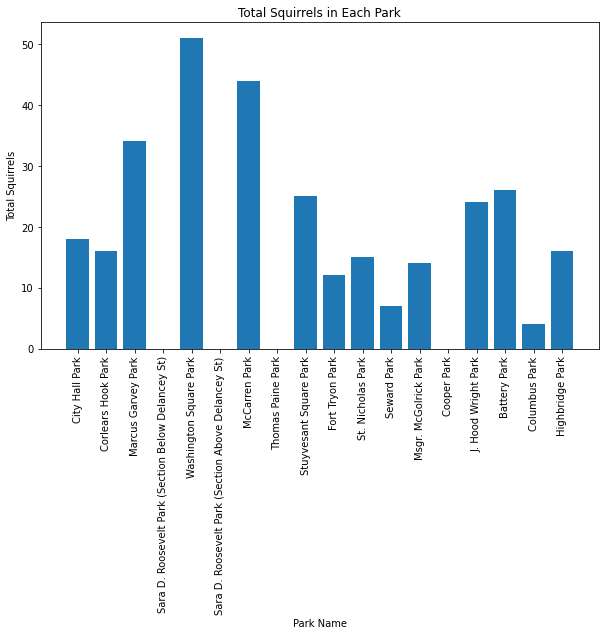

In [45]:
# Convert to Pandas for plotting (if the dataset is small enough)
import matplotlib.pyplot as plt
import pandas as pd

df_pandas = df_grouped.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(df_pandas['Park Name'], df_pandas['Total Squirrels'])
plt.xlabel('Park Name')
plt.ylabel('Total Squirrels')
plt.xticks(rotation=90)
plt.title('Total Squirrels in Each Park')
plt.show()


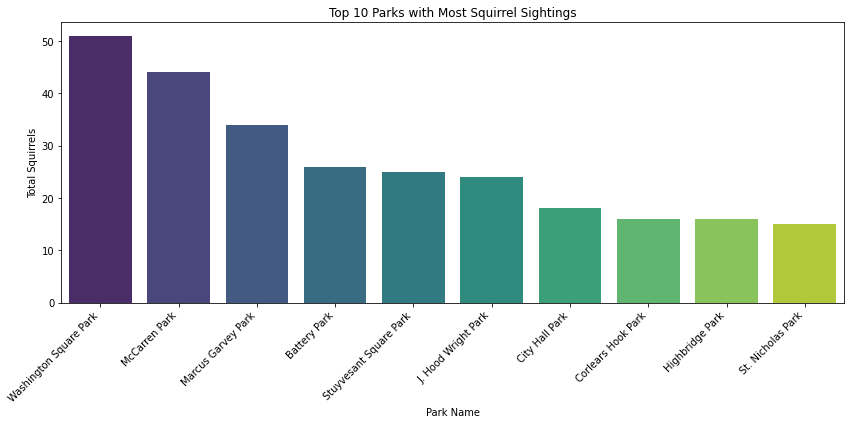

In [49]:
import seaborn as sns

# Plot the total squirrels for top parks
top_parks = df_grouped.orderBy(F.desc("Total Squirrels")).limit(10).toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_parks, x="Park Name", y="Total Squirrels", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Parks with Most Squirrel Sightings")
plt.xlabel("Park Name")
plt.ylabel("Total Squirrels")
plt.tight_layout()
plt.show()

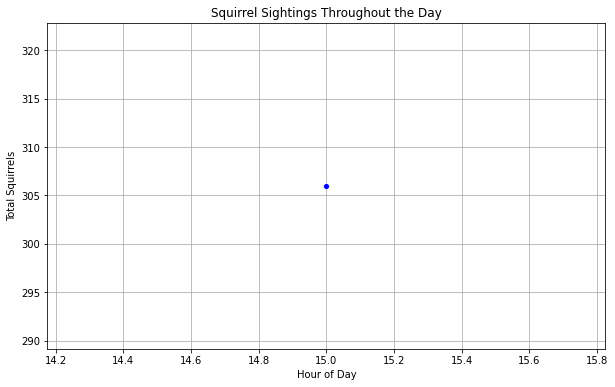

In [50]:
# Extract hour from Start Time
df_with_hour = df_cleaned.withColumn("Hour", F.hour(F.to_timestamp("Start Time", "h:mm:ss a")))

# Group by hour and sum squirrels
df_hourly = df_with_hour.groupBy("Hour").agg(F.sum("Number of Squirrels").alias("Total Squirrels"))
hourly_data = df_hourly.orderBy("Hour").toPandas()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_data, x="Hour", y="Total Squirrels", marker="o", color="blue")
plt.title("Squirrel Sightings Throughout the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Squirrels")
plt.grid()
plt.show()


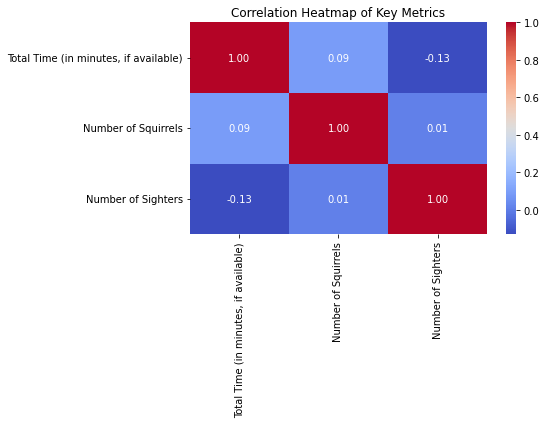

In [51]:
# Create a correlation matrix (use numeric columns only)
numeric_columns = ["Total Time (in minutes, if available)", "Number of Squirrels", "Number of Sighters"]
correlation_data = df_cleaned.select(*numeric_columns).toPandas().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Metrics")
plt.tight_layout()
plt.show()


Using Spark SQL to view data

In [46]:
import os
os.environ['HADOOP_HOME'] = 'C:/dummy_path'  # Or any dummy path

In [47]:
# Register the DataFrame as a temporary SQL table
df.createOrReplaceTempView("park_data")

In [48]:
# Perform the Spark SQL query
spark.sql("""
WITH ParkStats AS (
    SELECT
        `Park Name`,
        `Area Name`,
        `Park Conditions`,
        COUNT(`Number of Squirrels`) AS total_squirrel_sightings,
        COUNT(DISTINCT `Squirrel Sighter(s)`) AS unique_sighters,
        SUM(CAST(`Total Time (in minutes, if available)` AS INT)) AS total_observation_time,
        COUNT(DISTINCT `Area ID`) AS total_areas
    FROM
        park_data
    WHERE
        `Date` LIKE '3/1/20%'  -- Date format in your sample data
        AND `Park Conditions` IS NOT NULL
    GROUP BY
        `Park Name`, `Area Name`, `Park Conditions`
),
AnimalSightings AS (
    SELECT
        `Park Name`,
        COUNT(`Other Animal Sightings`) AS total_animal_sightings
    FROM
        park_data
    WHERE
        `Date` LIKE '3/1/20%'
    GROUP BY
        `Park Name`
)
SELECT
    ps.`Park Name`,
    ps.`Area Name`,
    ps.`Park Conditions`,
    ps.total_squirrel_sightings,
    ps.unique_sighters,
    ps.total_observation_time,
    ps.total_areas,
    as.total_animal_sightings
FROM
    ParkStats ps
JOIN
    AnimalSightings as ON ps.`Park Name` = as.`Park Name`
ORDER BY
    ps.total_squirrel_sightings DESC
LIMIT 10
""").show()

+--------------------+-----------------+--------------------+------------------------+---------------+----------------------+-----------+----------------------+
|           Park Name|        Area Name|     Park Conditions|total_squirrel_sightings|unique_sighters|total_observation_time|total_areas|total_animal_sightings|
+--------------------+-----------------+--------------------+------------------------+---------------+----------------------+-----------+----------------------+
|Msgr. McGolrick Park|         BROOKLYN|              Medium|                       1|              1|                    25|          1|                     1|
|       McCarren Park|         BROOKLYN|                Busy|                       1|              1|                    30|          1|                     1|
|     Highbridge Park|  UPPER MANHATTAN|Calm, pick-up bas...|                       1|              1|                    54|          1|                     1|
|       Columbus Park|  LOWER MANH

In [53]:
from pyspark.sql.window import Window

# Calculate cumulative squirrels by park
window_spec = Window.orderBy(F.desc("Total Squirrels"))
df_cumulative = df_grouped.withColumn("Cumulative Squirrels", F.sum("Total Squirrels").over(window_spec))
df_cumulative.show()


+--------------------+---------------+--------------------+
|           Park Name|Total Squirrels|Cumulative Squirrels|
+--------------------+---------------+--------------------+
|Washington Square...|             51|                  51|
|       McCarren Park|             44|                  95|
|  Marcus Garvey Park|             34|                 129|
|        Battery Park|             26|                 155|
|Stuyvesant Square...|             25|                 180|
| J. Hood Wright Park|             24|                 204|
|      City Hall Park|             18|                 222|
|  Corlears Hook Park|             16|                 254|
|     Highbridge Park|             16|                 254|
|   St. Nicholas Park|             15|                 269|
|Msgr. McGolrick Park|             14|                 283|
|     Fort Tryon Park|             12|                 295|
|         Seward Park|              7|                 302|
|       Columbus Park|              4|  

In [54]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression

# Prepare data
indexer = StringIndexer(inputCols=["Park Conditions"], outputCols=["ParkConditionsIndex"])
df_indexed = indexer.fit(df_cleaned).transform(df_cleaned)

assembler = VectorAssembler(
    inputCols=["ParkConditionsIndex", "Total Time (in minutes, if available)", "Number of Sighters"],
    outputCol="features"
)
df_features = assembler.transform(df_indexed).select("features", "Number of Squirrels")

# Train-Test Split
train_data, test_data = df_features.randomSplit([0.8, 0.2])

# Train Model
lr = LinearRegression(featuresCol="features", labelCol="Number of Squirrels")
model = lr.fit(train_data)

# Evaluate
predictions = model.transform(test_data)
predictions.select("features", "Number of Squirrels", "prediction").show()


+--------------+-------------------+--------------------+
|      features|Number of Squirrels|          prediction|
+--------------+-------------------+--------------------+
|[0.0,30.0,4.0]|                  7| -3.5658880100750228|
|[0.0,30.0,6.0]|                 44| -14.700702166941808|
|[0.0,40.0,2.0]|                 51|   8.512874305424097|
|[0.0,51.0,4.0]|                 12| -1.5835968769471247|
|[1.0,30.0,3.0]|                 15|  6.5810005570108885|
|[2.0,30.0,5.0]|                 26|0.025667888796617078|
|[5.0,30.0,1.0]|                 34|  36.033740668487745|
+--------------+-------------------+--------------------+

